In [9]:
#import fundamental libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
def deriv(psi,a):
    psiPrime = (np.roll(psi,-1) - np.roll(psi,1))/(2*a)
    psiPrime
    return psiPrime

In [16]:
def deriv2(psi,a):
    psi=psi[0:len(psi)-1]
    psi2Prime = (np.roll(psi,-1) - 2 * psi + np.roll(psi,1))/a**2
    #psi2Prime[0]=np.nan
    #psi2Prime[-1]=np.nan
    return psi2Prime

In [17]:
def laplace(psiNd,a):
    shape = psiNd.shape
    psiLapl = np.zeros(psiNd.shape)
    for i in range(shape[0]):
        psiLapl[i] = deriv2(psiNd[i],a)
    return psiLapl

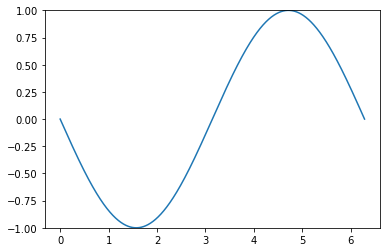

In [18]:
plt.plot(np.linspace(0,2*np.pi,1e5-1),deriv2(np.sin(np.linspace(0,2*np.pi,1e5)),2*np.pi/1e5))
plt.ylim(-1,1)
plt.show()

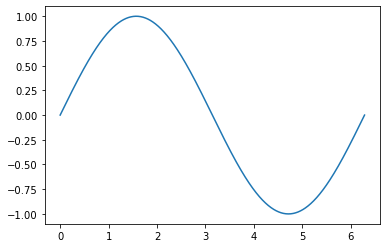

In [19]:
plt.plot(np.linspace(0,2*np.pi,1000),np.sin(np.linspace(0,2*np.pi,1000)))
plt.show()

In [20]:
print(np.roll(np.array([1,2,3,4,5,6]),-1))

[2 3 4 5 6 1]


In [94]:
bibedi=np.array([np.sin(np.linspace(0,10,1000)),np.cos(np.linspace(0,10,1000)),np.linspace(0,10,1000)])
blub=laplace(bibedi,1)
print(blub)
bi=np.shape(blub)
bi

ValueError: could not broadcast input array from shape (999) into shape (1000)

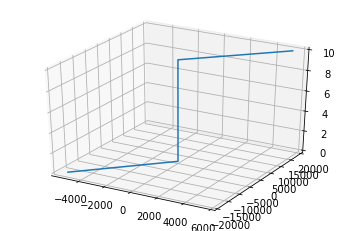

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=blub[0], ys=blub[1], zs=bibedi[2])

(-1, 1)

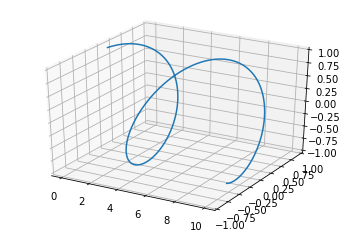

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=bibedi[2], ys=bibedi[0], zs=bibedi[1])
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

In [26]:
N=10
D=2
psi = np.zeros(N**D)


In [27]:
def coord2index(coordinates,N,D):
    index=0
    for i in range(D):
        index=index+coordinates[i]*N**i
    return index

In [28]:
a=np.array([0,1,1])
coord2index(a,2,3)

6

In [29]:
def index2coord(index,N,D):
    coordinates=np.zeros(D)
    for i in range(D):
        coordinates[D-i-1]=int((index)/(N**(D-i-1)))
        index=int((index)%(N**(D-i-1)))
    return coordinates

In [30]:
index2coord(6,2,3)

array([0., 1., 1.])

In [31]:
def neighbour(coordinate,axes,direction,N):
    nextn=coordinate
    nextn[axes]=coordinate[axes]+direction
    if coordinate[axes]==N and direction==1:
        nextn[axes]=0
    if coordinate[axes]==0 and direction==-1:
        nextn[axes]=N
    return nextn
    

In [91]:
#returns an array which gives periodically the potential for every lattice row
def boxpotential(height,N,D):
    boxy=np.zeros(N**D)
    for i in range(N**D):
        if i>N/4+N*int(i/(N)) and i<3*N/4+N*int(i/(N)):
            boxy[i]=0
        else:
            boxy[i]=height
    return boxy

In [92]:
test=boxpotential(2,10,2)
test

array([2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0.,
       0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0.,
       0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 2.,
       2., 2., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0.,
       2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 2., 2.])

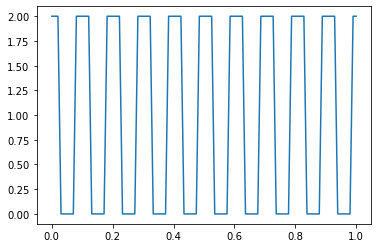

In [93]:
plt.plot(np.linspace(0,1,100),test)
plt.show()